# Demo: scanreader

Examples of scanreader usage from a [jupyter notebook](https://jupyter.org/) and from the commmand line.

## Libraries:

- [tifffile](https://github.com/cgohlke/tifffile/blob/master/tifffile/tifffile.py) to read ScanImage BigTiff files.
- [zarr](https://zarr.readthedocs.io/en/stable/) and [dask](https://www.dask.org/) for lazy-loading operations

## Imports

In [18]:
from typing import TYPE_CHECKING, Annotated
import os
import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import scanreader
from scanreader import ScanLBM
import dask.array as da
import zarr
import tifffile
import napari

from magicgui import magicgui

if TYPE_CHECKING:
  import napari
  from napari.types import ImageData

%load_ext autoreload
%autoreload 2
os.environ["LBM_DEBUG"] = "False"

def imread(data):
    return data


def gaussian_blur(
    layer: 'napari.layers.Image',
    sigma: Annotated[float, {'widget_type': 'FloatSlider', 'max': 6}] = 1.0,
    mode: Annotated[str, {'choices': ['reflect', 'constant', 'nearest', 'mirror', 'wrap']}]='nearest',
) -> 'typing.Optional[napari.types.ImageData]':
    """Apply a gaussian blur to ``layer``."""
    if layer:
        return skimage.filters.gaussian(layer.data, sigma=sigma, mode=mode)
    return None


def update_layer(name, data, **kwargs):
    """Update a layer in the viewer with new data.

    If data is None, then the layer is removed.
    If the layer is not present, it's added to the viewer.
    """
    if data is None:
        if name in viewer.layers:
            viewer.layers.pop(name)
        viewer.reset_view()
    elif name not in viewer.layers:
        viewer.add_image(data, name=name, rgb='False', multiscale=False, **kwargs)
        viewer.reset_view()
    else:
        viewer.layers[name].data = data

@magicgui(
    call_button="Load Volume",
    auto_call=True
)
def lbm_widget(
    layer: 'napari.layers.Image',
    data: ScanLBM = None,
    plane: int=1,
    x_left: int=1,
    x_right: int=1,
    filename: Path = Path()
) -> 'napari.types.ImageData':
    if array is None:
        print('None!')
    
    if not data:
        data = scanreader.read_scan(datapath, trim_roi_x=(8,8), trim_roi_y=(17,0))

    data.trim_x = (x_left, x_right)
    data.name = name
    data.channel_slice = plane
    array = data[:,plane,:,:]
    n = f"plane_{plane}"
    update_layer(n, array)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data path setup

Put all of the `.tiff` output files in a single directory. There should be **no other `.tiff` files other than those belonging to this session.

In [5]:
datapath = Path().home() / 'caiman_data' / 'high_res'
if datapath.is_dir():
    print([x.expanduser() for x in datapath.glob("*.tif*")])
else:
    print(f"No tiff files found in {datapath}")

[PosixPath('/home/mbo/caiman_data/high_res/MH70_0p6mm_FOV_50_550um_depth_som_stim_199mW_3min_M1_00001_00001.tif'), PosixPath('/home/mbo/caiman_data/high_res/extracted_plane_0.tif')]


## scanreader

Initialize a [scanreader](https://millerbrainobservatory.github.io/LBM-CaImAn-Python/scanreader.html) class object.

- The object returned from `read_scan` can be visualized just like a [dask array](https://examples.dask.org/array.html#Create-Random-array)

The resulting class holds **metadata and slice locations** that re-tile the strip when indexed.

In [6]:
data = scanreader.read_scan(datapath, trim_roi_x=(8,8), trim_roi_y=(17,0))

ic| __init__.py:88 

in get_files() at 14:52:30.476
ic| files_with_ext: [PosixPath('/home/mbo/caiman_data/high_res/MH70_0p6mm_FOV_50_550um_depth_som_stim_199mW_3min_M1_00001_00001.tif'),
                     PosixPath('/home/mbo/caiman_data/high_res/extracted_plane_0.tif')]
    excluded: [PosixPath('/home/mbo/caiman_data/high_res/extracted_plane_0.tif')]
    all_files: [PosixPath('/home/mbo/caiman_data/high_res/zarr'),
                PosixPath('/home/mbo/caiman_data/high_res/MH70_0p6mm_FOV_50_550um_depth_som_stim_199mW_3min_M1_00001_00001.tif'),
                PosixPath('/home/mbo/caiman_data/high_res/extracted_downsampled'),
                PosixPath('/home/mbo/caiman_data/high_res/extracted'),
                PosixPath('/home/mbo/caiman_data/high_res/mesmerize-batch'),
                PosixPath('/home/mbo/caiman_data/high_res/results'),
                PosixPath('/home/mbo/caiman_data/high_res/extracted_plane_0.tif'),
                PosixPath('/home/mbo/caiman_data/high_res/final'),
                Po

In [10]:
data.path

PosixPath('/home/mbo/caiman_data/high_res')

0.07910871505737305


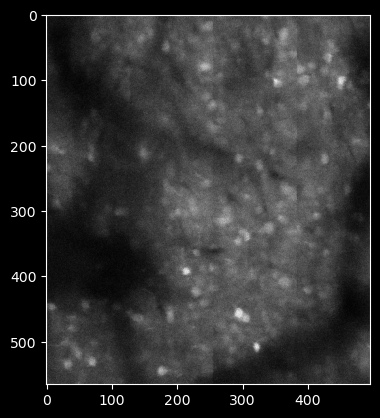

In [7]:
scanreader.quickplot(data[1,0,:,:])

In [4]:
plane_idx = 0
viewer = napari.Viewer(ndisplay=2)

# add a 3D image
blobs = data[:,plane_idx,:,:]
image_layer = viewer.add_image( blobs, name='volume', rgb=False, multiscale=False)

viewer.camera.angles = (45, 45, 45)
viewer.window.add_dock_widget(lbm_widget)

ic| len(y_list): 566
ic| item.shape: (1730, 1, 566, 496)
ic| pages.shape: (1730, 1, 583, 128)


In [11]:
save_zarr_path = datapath / 'zarr'
save_zarr_path.mkdir(exist_ok=True)
data.save_as_zarr(save_zarr_path)

11.320943355560303
11.146959066390991
11.230922222137451
10.970664978027344
10.97606372833252
10.837656497955322
11.056877374649048
10.829924583435059
10.878397464752197
10.87534213066101
10.839879035949707
10.83336329460144
10.63925051689148
10.642457962036133
10.620826244354248
10.584053993225098
10.831224203109741
10.150368928909302
10.571558952331543
10.210498809814453
10.792656660079956
10.496477603912354
11.740343809127808
9.88089895248413
10.323696851730347
10.397828817367554
10.579684257507324
10.04491925239563
10.261937141418457


In [13]:
!ls ~/caiman_data/high_res/zarr

Sourcing .zshenv...
extracted_plane_10.zarr  extracted_plane_1.zarr   extracted_plane_29.zarr
extracted_plane_11.zarr  extracted_plane_20.zarr  extracted_plane_2.zarr
extracted_plane_12.zarr  extracted_plane_21.zarr  extracted_plane_3.zarr
extracted_plane_13.zarr  extracted_plane_22.zarr  extracted_plane_4.zarr
extracted_plane_14.zarr  extracted_plane_23.zarr  extracted_plane_5.zarr
extracted_plane_15.zarr  extracted_plane_24.zarr  extracted_plane_6.zarr
extracted_plane_16.zarr  extracted_plane_25.zarr  extracted_plane_7.zarr
extracted_plane_17.zarr  extracted_plane_26.zarr  extracted_plane_8.zarr
extracted_plane_18.zarr  extracted_plane_27.zarr  extracted_plane_9.zarr
extracted_plane_19.zarr  extracted_plane_28.zarr


In [14]:
aer = zarr.open(save_zarr_path / 'extracted_plane_1.zarr')

In [ ]:
def imread(p=1):
    return zarr.open(save_zarr_path / f'extracted_plane_{p}.zarr')

In [22]:
viewer = napari.Viewer()
viewer.add_image(arr, name='data')

<Image layer 'data' at 0x7f1f60079d10>

<zarr.core.Array (1730, 1, 566, 496) float64>
{'layer_name': 'data', 'layer_base': 'data', 'source_type': '', 'plugin': '', 'coordinates': ''}
